In [1]:
%reload_ext autoreload
%autoreload 2

import sys, os
curr_path = str(globals()["_dh"][0])
print(curr_path)
sys.path.append(os.path.dirname(curr_path))

from image_utils import load_flickr_dataset, load_other_flickr_images, load_crepe_datasets, load_other_crepe_images
import os

from main import construct_qrels

import IPython

data_path="/data2/wuyinjun/"
query_path=os.path.dirname(curr_path) #curr_dir = str(globals()["_dh"][0])
print("query_path::",query_path)
dataset_name="crepe"

# dataset_name="flickr"
full_data_path = os.path.join(data_path, dataset_name)

queries, img_file_name_ls, sub_queries_ls, img_idx_ls, grouped_sub_q_ids_ls = load_crepe_datasets(full_data_path, query_path)
        # queries, raw_img_ls, sub_queries_ls, img_idx_ls = load_crepe_datasets_full(full_data_path, query_path)
img_idx_ls, img_file_name_ls = load_other_crepe_images(full_data_path, query_path, img_idx_ls, img_file_name_ls, total_count = -1)

cached_img_ls = img_idx_ls
qrels, queries, subset_q_idx = construct_qrels(dataset_name, queries, cached_img_ls, img_idx_ls, query_count=-1)

/home/wuyinjun/concept_based_retrieval/experiment_figures


2024-07-11 07:36:16.868232: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-11 07:36:18.211305: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


query_path:: /home/wuyinjun/concept_based_retrieval


100%|██████████| 7486/7486 [00:01<00:00, 6281.19it/s]


In [29]:
idx = 367
print(queries[idx])
print(sub_queries_ls[idx])
print(grouped_sub_q_ids_ls[idx])

man sitting on a horse with a wrap and another wrap on his ankle, and the horse is standing on clay
[['man sitting on a horse', 'a wrap on a horse', 'another wrap on his ankle', 'the horse is standing on clay']]
[[[0, 1, 2, 3]]]


In [36]:
print(method_two_res[str(idx+1)])
print(baseline_res[str(idx+1)])

{'315': 0.0048821051605045795, '238': 0.003896620124578476, '295': 0.003403670620173216, '368': 0.0033830476459115744, '114': 0.0032429653219878674, '458': 0.00323608610779047, '318': 0.003197076730430126, '491': 0.0031266738660633564, '270': 0.0031105545349419117, '293': 0.0031038536690175533, '286': 0.003096551401540637, '341': 0.0030919299460947514, '133': 0.0030557988211512566, '134': 0.0030481426510959864, '333': 0.003036077134311199, '290': 0.002888745628297329, '176': 0.002884497633203864, '100': 0.002839053049683571, '391': 0.0028261588886380196, '255': 0.0028115545865148306, '81': 0.0028069012332707644, '188': 0.002787936246022582, '405': 0.0027779722586274147, '281': 0.002776149660348892, '87': 0.0027236666064709425, '322': 0.00271717831492424, '433': 0.0026783528737723827, '165': 0.002652272582054138, '25': 0.002650041598826647, '57': 0.002648055087774992, '500': 0.0026362489443272352, '254': 0.002626336645334959, '175': 0.00262504443526268, '365': 0.00262231333181262, '418'

/data2/wuyinjun/crepe/VG_100K/2360676.jpg


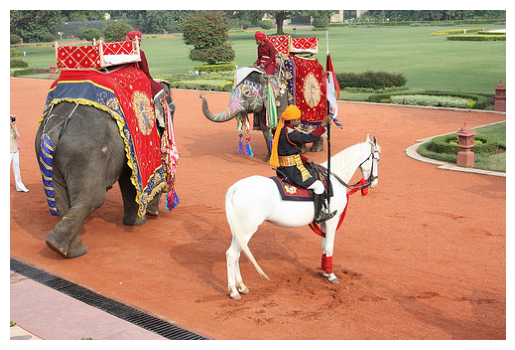

In [37]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
idx=367
# Load the image
image_path = img_file_name_ls[idx]
print(image_path)
# image_path="/data2/wuyinjun/flickr/flickr30k-images/1000366164.jpg"
image = mpimg.imread(image_path)

# plt.title("Sheep Image")
# plt.xlabel("X pixel scaling")
# plt.ylabel("Y pixel scaling")
plt.axis('off')
plt.imshow(image)
# plt.savefig("crepe_data/example.jpg", bbox_inches='tight', pad_inches=0)
plt.show()

In [4]:
import utils

baseline_res_file=os.path.join(os.path.dirname(curr_path), "output/saved_patches_crepe_4_8_16_64_128_method_one.pkl")
method_two_res_file=os.path.join(os.path.dirname(curr_path), "output/saved_patches_crepe_4_8_16_64_128_query_img_method_two.pkl")
method_four_res_file=os.path.join(os.path.dirname(curr_path), "output/saved_patches_crepe_4_8_16_64_128_query_img_method_four.pkl")


baseline_res = utils.load(baseline_res_file)
method_two_res = utils.load(method_two_res_file)
method_four_res = utils.load(method_four_res_file)

In [6]:
from beir.retrieval.evaluation import EvaluateRetrieval
from beir.retrieval.search.dense import DenseRetrievalExactSearch as DRES


retrieval_model = DRES(batch_size=16, algebra_method="two", is_img_retrieval=True, prob_agg="prod", dependency_topk=20)
# else:
#     retrieval_model = DRES(models.SentenceBERT("msmarco-distilbert-base-tas-b"), batch_size=16, algebra_method=one)
retriever = EvaluateRetrieval(retrieval_model, score_function="cos_sim") # or "cos_sim" for cosine similarity

print(list(qrels.keys()))
print(list(method_two_res.keys()))

for key in qrels:
    ndcg0, _map0, recall0, precision0 = retriever.evaluate({key:qrels[key]}, {key:baseline_res[key]}, retriever.k_values, ignore_identical_ids=False)
    ndcg1, _map1, recall1, precision1 = retriever.evaluate({key:qrels[key]}, {key:method_two_res[key]}, retriever.k_values, ignore_identical_ids=False)
    ndcg2, _map2, recall2, precision2 = retriever.evaluate({key:qrels[key]}, {key:method_four_res[key]}, retriever.k_values, ignore_identical_ids=False)

    if (ndcg2["NDCG@3"] > ndcg1["NDCG@3"] or ndcg2["NDCG@1"] > ndcg1["NDCG@1"]) and (ndcg1["NDCG@3"] > ndcg0["NDCG@3"]):
        print(key, ndcg0, ndcg1, ndcg2)
    

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '